In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_emails = pd.read_csv('email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,nan,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,nan,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,nan,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,nan,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,nan,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


# How many rows are in the two datasets? 

In [4]:
print("In activity_data.csv:", len(df_activity),"\nIn email_data.csv:" , len(df_emails))

In activity_data.csv: 4559973 
In email_data.csv: 474163


# If the log of emails represents 3% of the emails we sent over this period, how many emails did we send?

In [5]:
def percentage(percent, partial):
    whole = partial * 100/percent
    return whole
percent = input("Tell me these data are how much percent of overall data: ")
print("The Overall number of Emails: ",percentage(int(percent), len(df_activity)))

Tell me these data are how much percent of overall data: 3
The Overall number of Emails:  151999100.0


# What are the earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)? 
### (use python to print the date in format mm/dd/yyy hour:minute in 24 hour time)

In [7]:
from datetime import datetime

def convert_time(input_date):
    temp_date = datetime.strptime(input_date, "%Y-%m-%d %H:%M:%S.%f")
    converted_date = str(temp_date.strftime("%x") + " " + temp_date.strftime("%H:%M"))
    return converted_date

In [8]:
current_day = df_emails.EmailSentDateTimeUtc
print("The most recent Email: ", convert_time(max(current_day)), "\nThe earliest Email: ", convert_time(min(current_day)))

The most recent Email:  04/19/21 13:45 
The earliest Email:  01/04/18 04:29


# Which 10 zip codes receive the most emails and how many emails do they receive?

In [9]:
grouped_by_zipcode = df_emails.groupby(['ZipCode']).size().reset_index(name='counts')
sorted_by_counts = grouped_by_zipcode.sort_values(by=['counts'], ascending=False)
sorted_by_counts.head(10)

,ZipCode,counts
8975,63301.000,312
4353,33801.000,310
4416,34210.000,299
5088,38301.000,295
9576,67460.000,285
13690,95971.000,277
5524,42301.000,266
4707,36104.000,254
5431,40769.000,234
12440,85225.000,229


# Plot two lines on a single graph.
* total distinct users who were sent at least 1 email by month and year.
* the monthly percentage of users who were sent an email and were active the same day

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
merged = pd.merge(df_emails, df_activity, on='UserId', how='left')

In [13]:
merged['EmailSentDateTimeUtc'] = pd.to_datetime(merged['EmailSentDateTimeUtc'])
merged['EmailOpenedDateTimeUtc'] = pd.to_datetime(merged['EmailOpenedDateTimeUtc'])
merged['EmailClickedDateTimeUtc'] = pd.to_datetime(merged['EmailClickedDateTimeUtc'])

In [14]:
#total inactive users
merged['DateOfActivityPST'].isna().sum()

57518

In [15]:
active_users = merged[['EmailSentDateTimeUtc','UserId','DateOfActivityPST']]

In [16]:
au = active_users.groupby(active_users['EmailSentDateTimeUtc'].dt.strftime('%Y-%m'))['DateOfActivityPST'].apply(lambda x: x.notnull().sum()/len(x)*100)

Getting unique users per month

In [17]:
df_emails['EmailSentDateTimeUtc'] = pd.to_datetime(df_emails['EmailSentDateTimeUtc'])
unique_ids = df_emails.groupby(df_emails['EmailSentDateTimeUtc'].dt.strftime('%Y-%m'))['UserId'].nunique()

<AxesSubplot:label='5a828b0a-a4a5-40e7-8333-a13253616d90', xlabel='EmailSentDateTimeUtc', ylabel='% Active Users'>

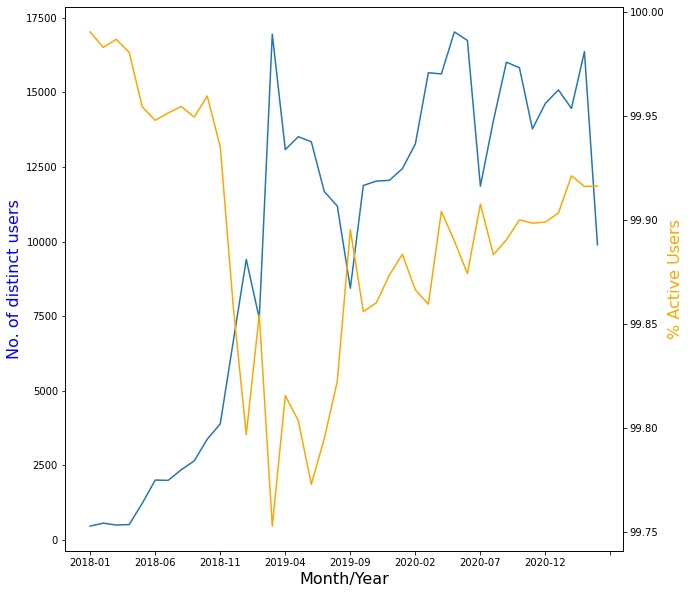

In [18]:
ax = unique_ids.plot(figsize=(10,10))
ax.set_xlabel('Month/Year', color='black', fontsize=16)
ax.set_ylabel('No. of distinct users', color='blue', fontsize=16)
ax2 = ax.twinx()
ax2.set_ylabel('% Active Users', color='orange', fontsize=16)
au.plot(color = 'orange')